In [1]:
%load_ext autoreload 
%autoreload 2
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from stop_words import get_stop_words

2024-03-07 13:20:59.475 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2024-03-07 13:20:59.487 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager


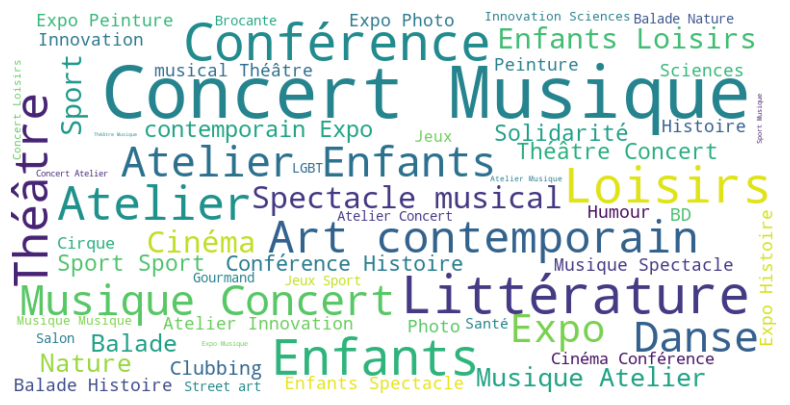

In [2]:
from src.utils import etl
wordcloud =etl.plot_wordclout()
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

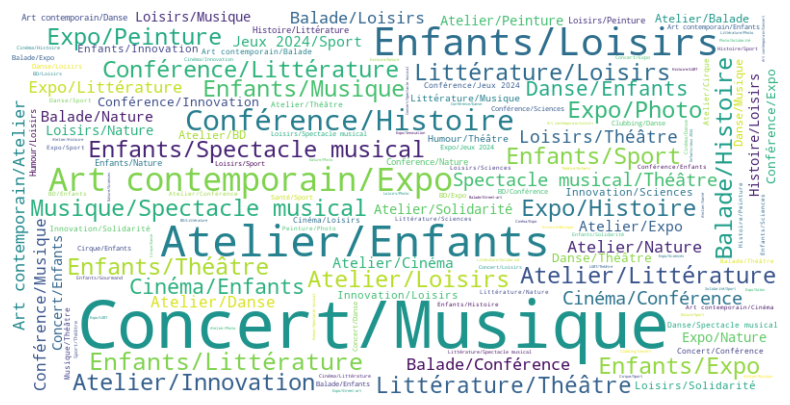

In [15]:
import streamlit as st
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.util import bigrams
import nltk
from collections import Counter

def load_data():
    """Loads event data from a specified CSV file."""
    df = pd.read_csv("data.csv", sep=";")
    return df
def plot_wordclout_from_bigrams():
    
    df = load_data()
    data = df['Mots clés'].dropna().astype(str).values.tolist()
    filtered_data = [item.split(',') for item in data if item != 'nan']
    
    bigram_list = [bigram for sublist in filtered_data for bigram in bigrams(sublist)]
    bigram_strings = ['/'.join(bigram) for bigram in bigram_list]
    
    bigram_frequency = Counter(bigram_strings)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(bigram_frequency)
    return wordcloud
wordcloud = plot_wordclout_from_bigrams()

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()